In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dfc1=pd.read_csv(r'C:\Users\hp\Downloads\Final_Test.csv')
dfc1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
dfc1.shape

(1987, 6)

In [5]:
dfc1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [6]:
dfc1.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [7]:
dfc1.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
dfc1['Rating']=imp.fit_transform(dfc1['Rating'].values.reshape(-1,1))
dfc1['Miscellaneous_Info']=imp.fit_transform(dfc1['Miscellaneous_Info'].values.reshape(-1,1))
dfc1['Place']=imp.fit_transform(dfc1['Place'].values.reshape(-1,1))

In [12]:
dfc1.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [14]:
print(dfc1['Rating'].value_counts())

100%    1313
98%      112
97%       84
99%       68
96%       65
94%       51
95%       47
93%       34
92%       29
90%       29
91%       26
88%       13
89%       11
87%       11
83%       11
82%        9
85%        8
71%        7
84%        7
80%        7
86%        6
73%        5
67%        5
76%        4
70%        4
60%        4
55%        3
81%        3
64%        2
69%        2
79%        2
77%        1
78%        1
52%        1
53%        1
65%        1
Name: Rating, dtype: int64


General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64


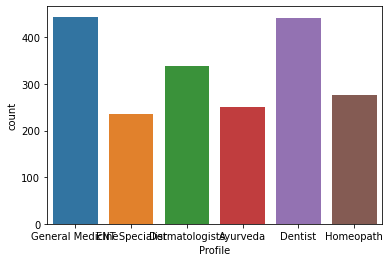

In [15]:
sns.countplot(x='Profile',data=dfc1)
print(dfc1['Profile'].value_counts())

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in dfc1.columns:
    if dfc1[i].dtype=="object":
        dfc1[i]=enc.fit_transform(dfc1[i].values.reshape(-1,1))

In [17]:
dfc1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,241.0,28.0,0.0,142.0,4.0,598.0
1,340.0,24.0,0.0,580.0,3.0,598.0
2,258.0,34.0,9.0,212.0,2.0,153.0
3,6.0,0.0,0.0,374.0,0.0,598.0
4,79.0,7.0,0.0,231.0,1.0,816.0


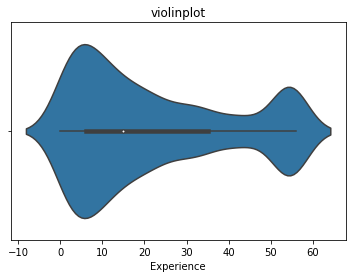

In [18]:
sns.violinplot(x='Experience',data=dfc1)
plt.title('violinplot')
plt.show()

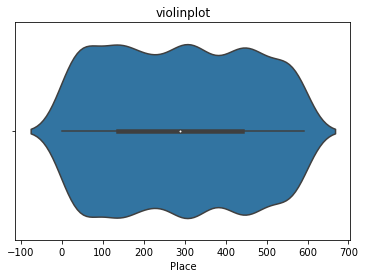

In [19]:
sns.violinplot(x='Place',data=dfc1)
plt.title('violinplot')
plt.show()

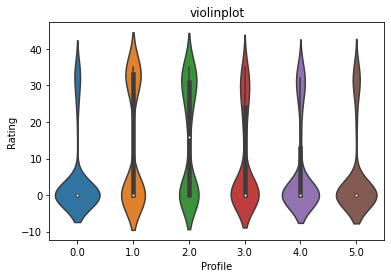

In [20]:
sns.violinplot(x='Profile',y='Rating',data=dfc1)
plt.title('violinplot')
plt.show()

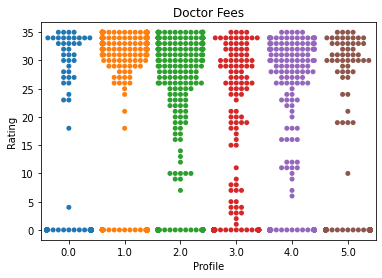

In [23]:
ax=sns.swarmplot(x='Profile',y='Rating',data=dfc1)
plt.title('Doctor Fees')
plt.show()

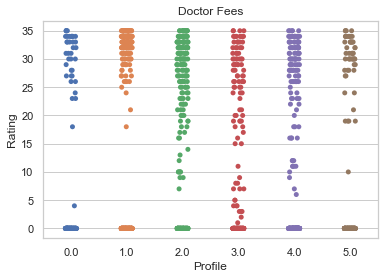

In [24]:
sns.set(style='whitegrid')
sns.stripplot(x='Profile',y='Rating',data=dfc1)
plt.title('Doctor Fees')
plt.show()

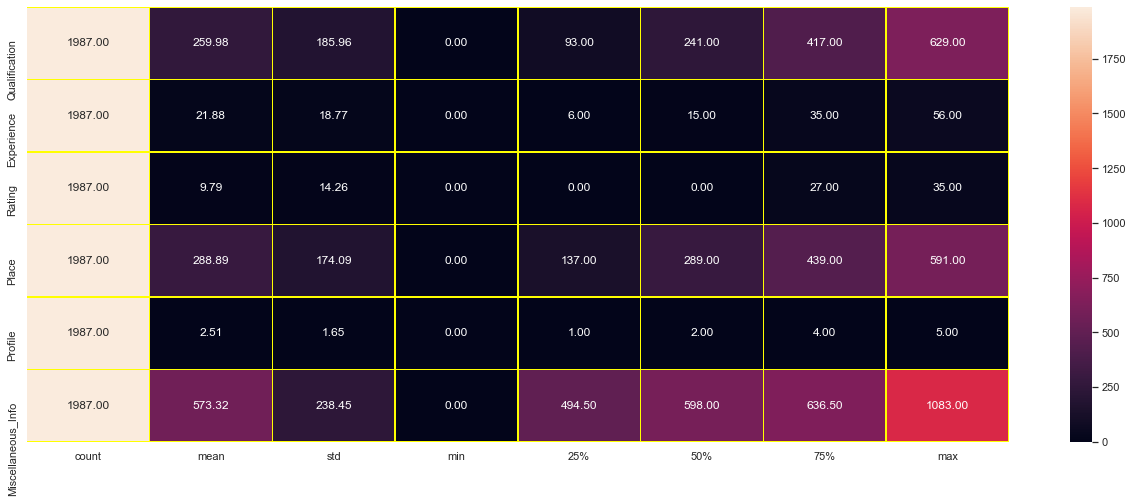

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(dfc1.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

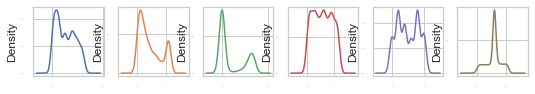

In [26]:
dfc1.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

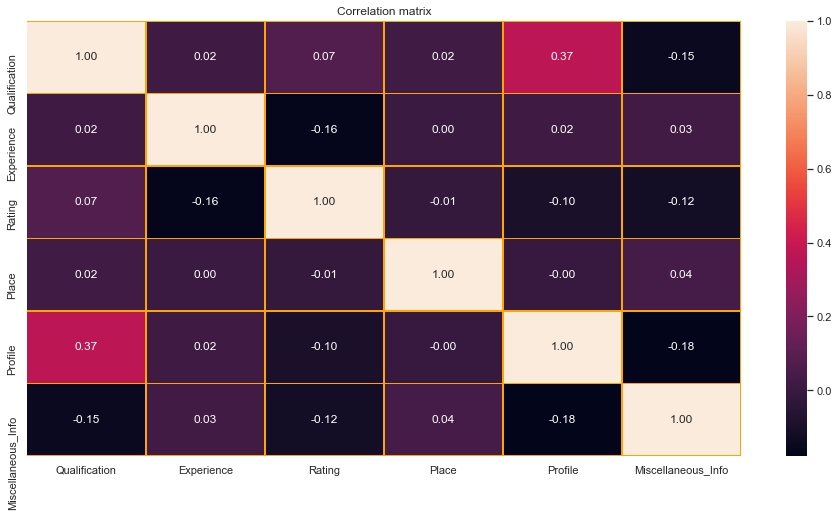

In [27]:
corr=dfc1.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

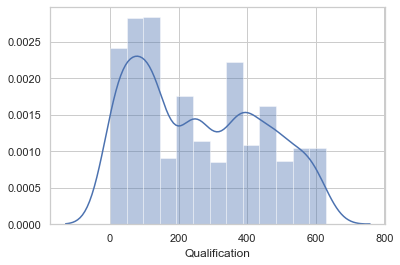

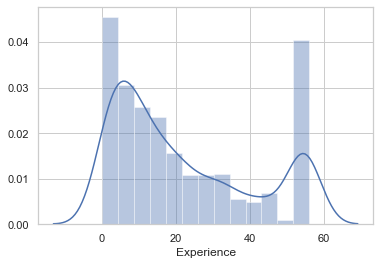

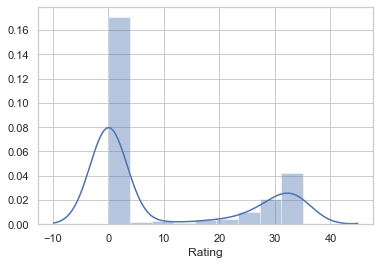

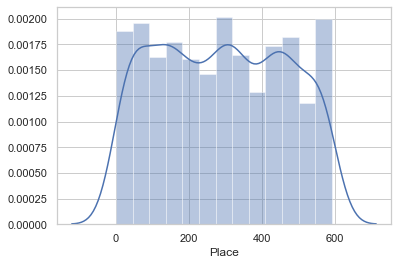

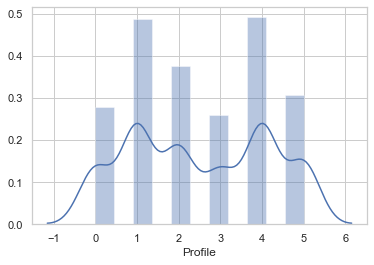

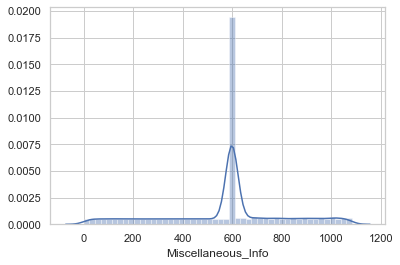

In [28]:
for j in dfc1.columns:
    plt.figure()
    sns.distplot(dfc1[j])

In [29]:
import joblib
fit_model=joblib.load('doctorconsultationmodel.pkl')

In [30]:
fit_model

RandomForestRegressor()

In [31]:
prediction=fit_model.predict(dfc1)

In [32]:
prediction

array([397. , 397. , 399.5, ..., 397. , 399.5, 397. ])

In [33]:
dp=pd.DataFrame(prediction)

In [34]:
dp

,0
0,397.0
1,397.0
2,399.5
3,424.0
4,397.0
...,...
1982,380.5
1983,397.0
1984,397.0
1985,399.5
